In [1]:

import pandas as pd
from sqlalchemy import create_engine
from datetime import date, timedelta
import calendar

pd.options.display.max_rows = 8

engine = create_engine('mysql+pymysql://root:@localhost:3306/stock')
conmy = engine.connect()

In [2]:
today = date.today() 
today

datetime.date(2018, 5, 31)

In [3]:
today = date(2018, 5, 28)
today

datetime.date(2018, 5, 28)

In [3]:
sql = '''
SELECT B.name, B.date, volbuy, B.price AS unit_cost, volbuy * B.price AS cost_amount, 
P.price AS price, volbuy * P.price AS market_value,
(volbuy * P.price) - (volbuy * B.price) AS profit, period 
FROM buy B JOIN price P USING (name) 
WHERE active=1 AND period IN ('3','4') AND P.date = "%s" 
ORDER BY period, B.name
'''
sql = sql % today
print(sql)


SELECT B.name, B.date, volbuy, B.price AS unit_cost, volbuy * B.price AS cost_amount, 
P.price AS price, volbuy * P.price AS market_value,
(volbuy * P.price) - (volbuy * B.price) AS profit, period 
FROM buy B JOIN price P USING (name) 
WHERE active=1 AND period IN ('3','4') AND P.date = "2018-05-31" 
ORDER BY period, B.name



In [4]:
df = pd.read_sql(sql, conmy, parse_dates=['date'], index_col='name')
df

,date,volbuy,unit_cost,cost_amount,price,market_value,profit,period
name,,,,,,,,
AEONTS,2018-04-26,1200.0,175.00,210000.0,158.00,189600.0,-20400.0,3
AMATA,2018-01-26,12000.0,25.00,300000.0,23.00,276000.0,-24000.0,3
BTS,2018-02-12,30000.0,7.85,235500.0,9.70,291000.0,55500.0,3
EA,2018-05-21,5000.0,38.00,190000.0,38.75,193750.0,3750.0,3
...,...,...,...,...,...,...,...,...
ORI,2017-12-22,12000.0,19.90,238800.0,20.00,240000.0,1200.0,4
PLANB,2018-02-15,45000.0,6.40,288000.0,6.35,285750.0,-2250.0,4
SAT,2018-02-20,4000.0,20.40,81600.0,22.50,90000.0,8400.0,4
VIBHA,2017-11-20,90000.0,2.76,248400.0,2.58,232200.0,-16200.0,4


In [5]:
file_name   = 'stock-by-period.csv'
output_file = '../data/' + file_name
df_out = df
df_out.to_csv(output_file)

In [78]:
name = 'AMATA'

In [79]:
df.ix[name]

date            2018-01-26 00:00:00
volbuy                        12000
cost_amount                  300000
market_value                 258000
period                    day trade
Name: AMATA, dtype: object

In [80]:
sql = 'UPDATE buy SET period = "3" WHERE name = "%s"'
sql = sql % name
sql

'UPDATE buy SET period = "3" WHERE name = "AMATA"'

In [81]:
rp = conmy.execute(sql)
rp.rowcount

1

In [16]:
df.period.replace(['1','2','3','4'], ['disposal','high dividend','long term','short term'], inplace=True)
grouped = df.groupby(by='period')
grouped['cost_amount','market_value'].sum()

,cost_amount,market_value
period,,
disposal,2062400.0,1177200.0
high dividend,2874356.0,2431000.0
long term,2511200.0,2520450.0
short term,2965200.0,3006800.0


In [17]:
cost_summary = grouped.sum().cost_amount
cost_summary

period
disposal         2062400.0
high dividend    2874356.0
long term        2511200.0
short term       2965200.0
Name: cost_amount, dtype: float64

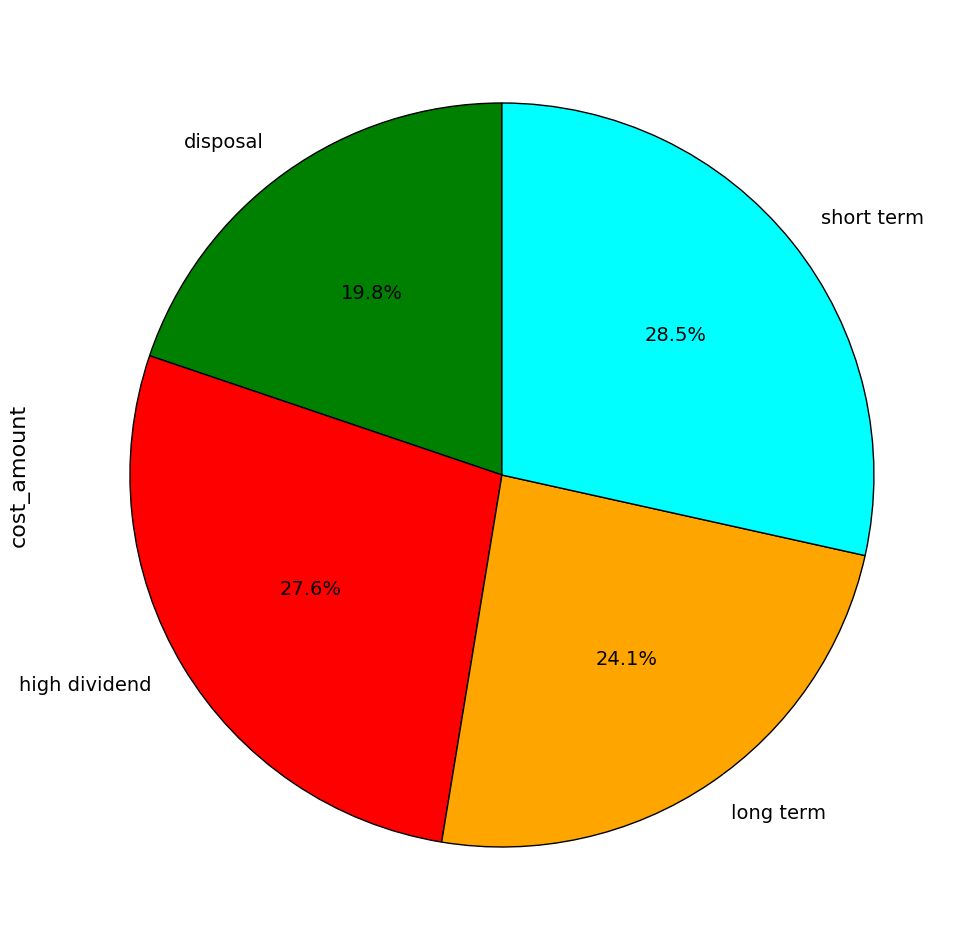

In [18]:
fig_path = '../fig/Portfolio-at-Cost-1805.png'
with plt.style.context('my_custom_style'):
    plt.figure(figsize=(12, 12))
    ax = cost_summary.plot.pie(colors=['green','red','orange','cyan'],
                               startangle=90,
                               autopct='%1.1f%%')
    plt.savefig(fig_path)

In [19]:
market_summary = grouped.sum().market_value
market_summary

period
disposal         1177200.0
high dividend    2431000.0
long term        2520450.0
short term       3006800.0
Name: market_value, dtype: float64

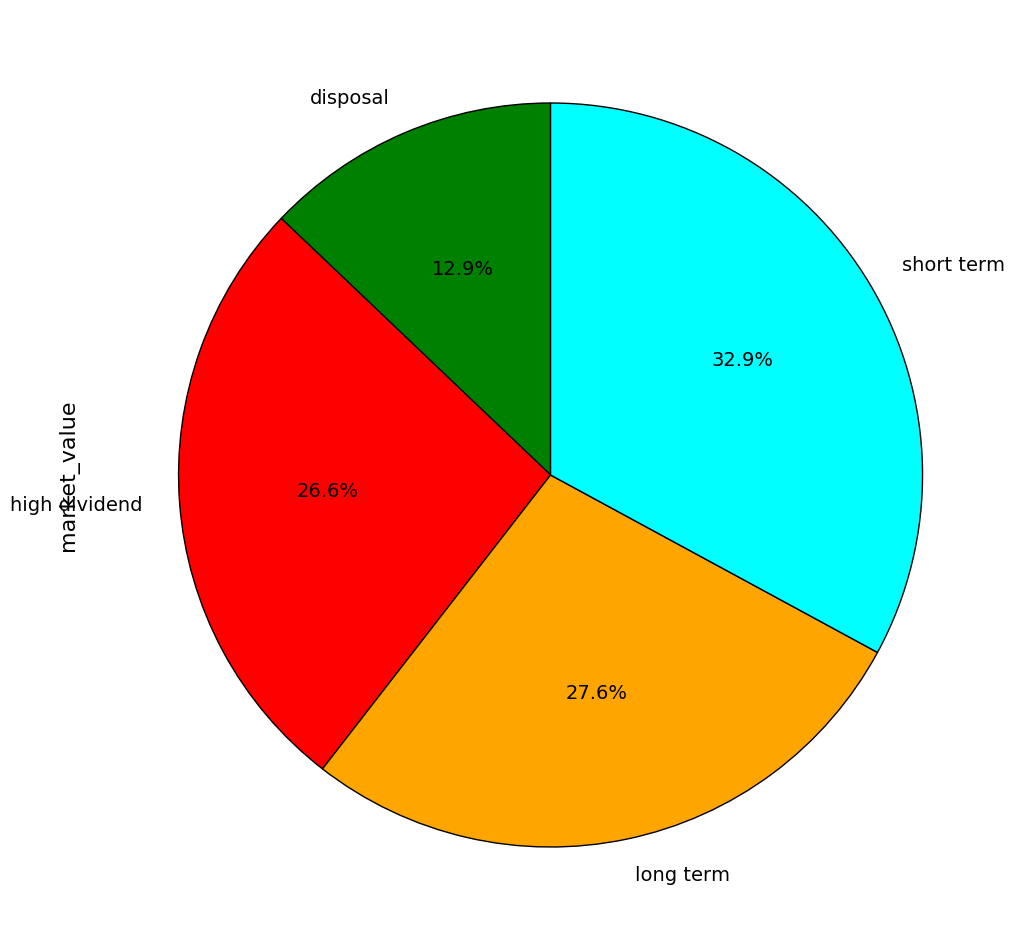

In [20]:
fig_path = '../fig/Portfolio-at-Market-1805.png'
with plt.style.context('my_custom_style'):
    plt.figure(figsize=(12, 12))
    ax = market_summary.plot.pie(colors=['green','red','orange','cyan'],
                               startangle=90,
                               autopct='%1.1f%%')
    plt.savefig(fig_path)

In [ ]:
sql = '''
SELECT * 
FROM buy
LIMIT 1'''
print(sql)

In [ ]:
buy = pd.read_sql(sql,conmy)
buy.dtypes